# 🌍 Education Inequality Trends (2010-2021)

This notebook analyzes education inequality trends across countries using the dataset (2010–2021).
- Explore global, regional, and development group patterns
- Compare countries with high vs low inequality
- Visualize trends and relationships with HDI Rank


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load dataset
file_path = Path('Analyzing Education Inequality Trends and Relationships (20102021).csv')
df = pd.read_csv("../data/Analyzing Education Inequality Trends and Relationships (20102021).csv")
df.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Education Inequality (2010),Education Inequality (2011),Education Inequality (2012),Education Inequality (2013),Education Inequality (2014),Education Inequality (2015),Education Inequality (2016),Education Inequality (2017),Education Inequality (2018),Education Inequality (2019),Education Inequality (2020),Education Inequality (2021)
0,AFG,Afghanistan,Low,SA,180,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148,20.654419,19.991823,19.473658,19.258472,19.135457,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,Unknown,40,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26,20.654419,19.991823,19.473658,19.258472,19.135457,19.133751,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [18]:
# Melt inequality columns into year-value pairs
year_cols = [c for c in df.columns if 'Education Inequality' in c]

df_long = df.melt(
    id_vars=['ISO3','Country','Human Development Groups','UNDP Developing Regions','HDI Rank (2021)'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Education_Inequality'
)
df_long['Year'] = df_long['Year'].str.extract('(\\d{4})').astype(int)
df_long.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Year,Education_Inequality
0,AFG,Afghanistan,Low,SA,180,2010,42.809000
1,AGO,Angola,Medium,SSA,148,2010,20.654419
2,ALB,Albania,High,ECA,67,2010,11.900000
3,AND,Andorra,Very High,Unknown,40,2010,15.160302
4,ARE,United Arab Emirates,Very High,AS,26,2010,20.654419


## 🔹 Global Trend
Average inequality across all countries over time.

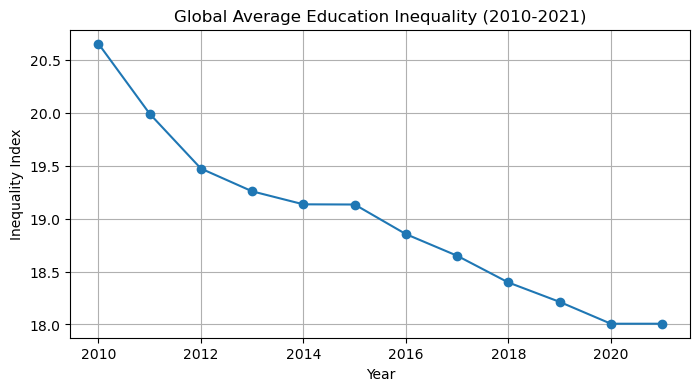

In [21]:
global_trend = df_long.groupby('Year')['Education_Inequality'].mean()
plt.figure(figsize=(8,4))
global_trend.plot(marker='o')
plt.title('Global Average Education Inequality (2010-2021)')
plt.ylabel('Inequality Index')
plt.grid(True)
plt.show()

## 🔹 Regional Comparison
Compare average inequality by UNDP Developing Regions.

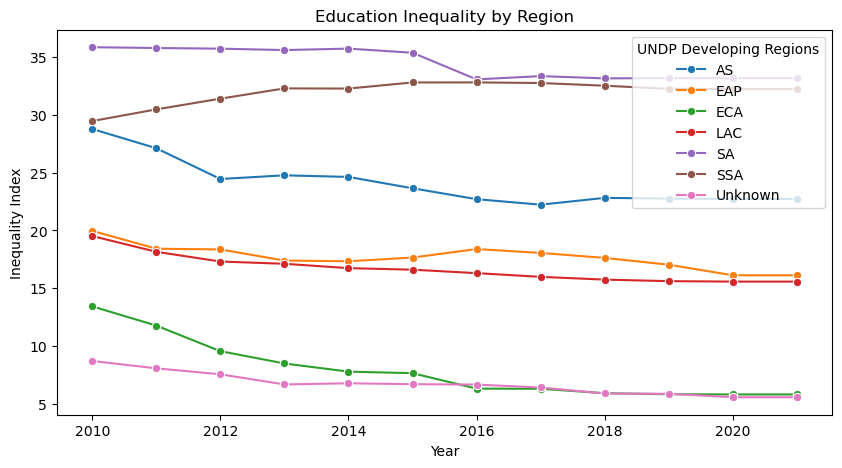

In [24]:
regional_trend = df_long.groupby(['Year','UNDP Developing Regions'])['Education_Inequality'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=regional_trend, x='Year', y='Education_Inequality', hue='UNDP Developing Regions', marker='o')
plt.title('Education Inequality by Region')
plt.ylabel('Inequality Index')
plt.show()

## 🔹 Development Groups
How inequality differs by Human Development Group.

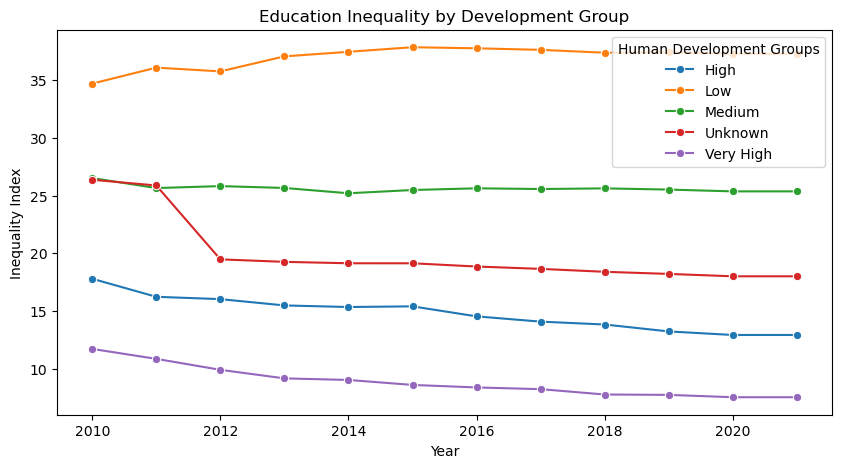

In [27]:
dev_trend = df_long.groupby(['Year','Human Development Groups'])['Education_Inequality'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=dev_trend, x='Year', y='Education_Inequality', hue='Human Development Groups', marker='o')
plt.title('Education Inequality by Development Group')
plt.ylabel('Inequality Index')
plt.show()

## 🔹 Top/Bottom Countries (2021)
Identify extremes of inequality in the latest year.

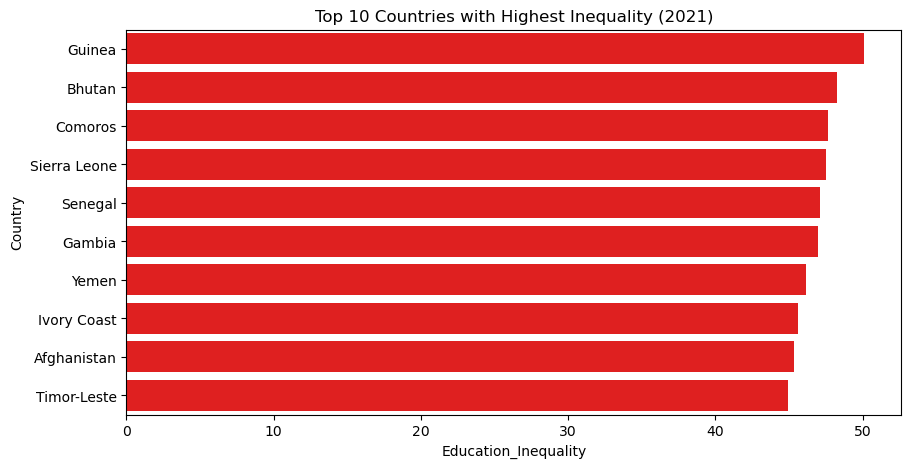

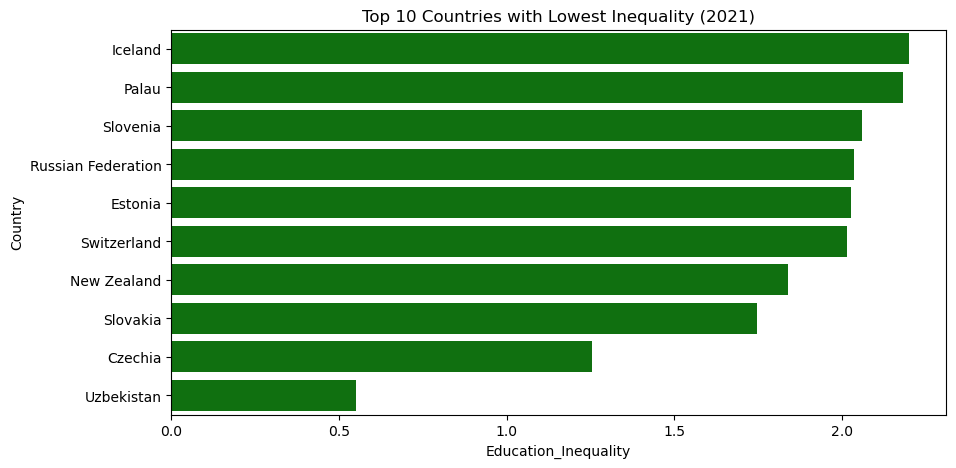

In [30]:
latest = df_long[df_long['Year']==2021].sort_values('Education_Inequality', ascending=False)
top10 = latest.head(10)
bottom10 = latest.tail(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top10, x='Education_Inequality', y='Country', color='red')
plt.title('Top 10 Countries with Highest Inequality (2021)')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=bottom10, x='Education_Inequality', y='Country', color='green')
plt.title('Top 10 Countries with Lowest Inequality (2021)')
plt.show()

## 🔹 Correlation with HDI Rank (2021)
Check if education inequality is related to HDI rank.

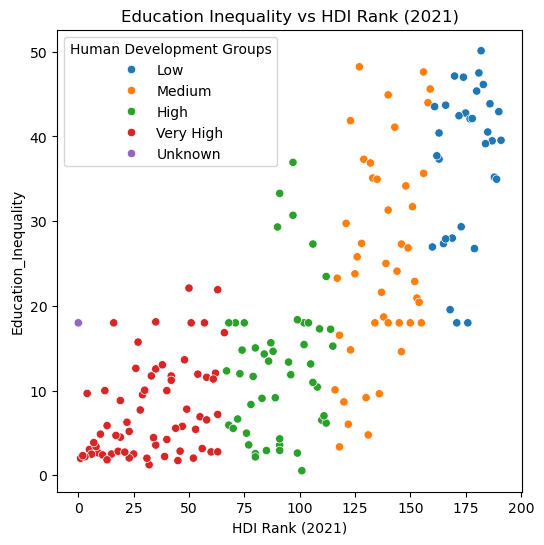

Correlation between HDI Rank and Inequality (2021): 0.7540232554633308


In [33]:
corr_df = df_long[df_long['Year']==2021]
plt.figure(figsize=(6,6))
sns.scatterplot(data=corr_df, x='HDI Rank (2021)', y='Education_Inequality', hue='Human Development Groups')
plt.title('Education Inequality vs HDI Rank (2021)')
plt.show()
corr = corr_df[['HDI Rank (2021)','Education_Inequality']].corr().iloc[0,1]
print('Correlation between HDI Rank and Inequality (2021):', corr)